In [55]:
import snakes_and_ladders
import frog_puzzle
import stock_mrp

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Snakes and Ladders

## Markov Process

In [2]:
snakes_and_ladders_mp = snakes_and_ladders.create_snake_and_ladders_mp()
snake_traces = snakes_and_ladders.traces(snakes_and_ladders_mp)


In [3]:
snake_trace_list = [list( next(snake_traces) ) for _ in range(100000) ]


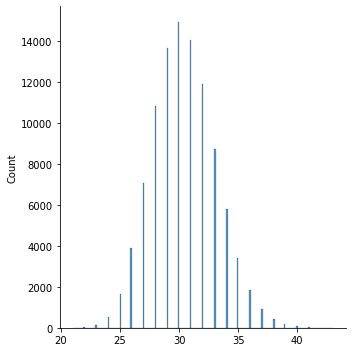

In [4]:
sns.displot([len(x) for x in snake_trace_list])

## Markov Reward Process

In [5]:
snakes_and_ladders_mrp = snakes_and_ladders.create_snake_and_ladders_mrp()

In [6]:
exp_dice_rolls = snakes_and_ladders_mrp.get_value_function_vec(gamma=1.0)[0]

print(f"Expected Number of Dice Rolls: {exp_dice_rolls : 0.2f}")

Expected Number of Dice Rolls:  29.43


# Frog Puzzle

In [7]:
frog_puzzle_mp = frog_puzzle.create_frog_puzzle(n=10)
frog_traces = frog_puzzle.traces(frog_puzzle_mp, 10)
frog_trace_list = [list( next(frog_traces) ) for _ in range(100000) ]


In [8]:
empirical_avg_frog = np.mean([len(x) for x in frog_trace_list]) - 1.0 # take out start state
print(f"Empirical Avg for Frog Puzzle: {empirical_avg_frog : 0.2f}")

Empirical Avg for Frog Puzzle:  2.93


In [9]:
theoretical_avg = np.sum([(1/i) for i in range(1, 11, 1)]) # harmonic sum
print(f"Theoretical Avg for Frog Puzzle: {theoretical_avg : 0.2f}")

Theoretical Avg for Frog Puzzle:  2.93


# Stock Price Example

In [48]:
stock_traces = stock_mrp.traces()
stock_trace_list = []

for _ in range(100):
    single_trace = []
    tmp = next(stock_traces)
    for _ in range(100):
        single_trace.append(next(tmp).reward)
    stock_trace_list.append(single_trace)

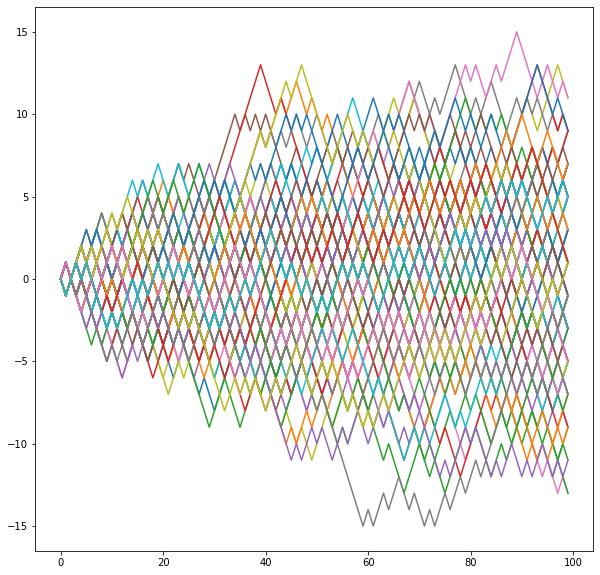

In [59]:
_, ax = plt.subplots(1,1, figsize=(10, 10))

for i in range(100):
    sns.lineplot(x=range(100), y=stock_trace_list[i], ax=ax)